Import Libraries

In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

##### Data Understanding

Descrição dos Dados:

Tabela: 
(a) Contagem Total de Amostras; OK
(b) Contagem de Amostras por Classe (útil para detectar desequilíbrios de classe);  OK
(c) Contagem de amostras por classes após remover amostras com dados faltantes; OK


Tabela: 
Resumo Estatístico: 
Primeira coluna terá o nome/tipo dos atributos e classe.  
As demais colunas são: tipo do atributo (numérico, categórico etc), quantidade e porcentagem de dados ausentes em cada atributo, média (e desvio padrão), valor máximo e mínimo. Para dados categóricos, a frequência das categorias etc.


In [132]:
data = pd.read_excel('appendicit.xlsx')

In [133]:
data.shape

(782, 58)

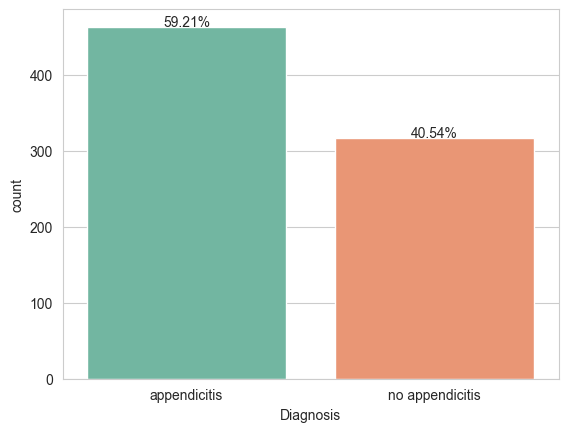

In [134]:
sns.set_style(style='whitegrid')
sns.set_palette(palette='Set2')
count_diag = sns.countplot(data=data, x='Diagnosis', hue='Diagnosis', legend=False)

total = float(len(data))
for p in count_diag.patches:
    height = p.get_height()
    count_diag.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100), ha="center")

##### Variables

In [135]:
demographic =  ["Age", "Sex", "Height","Weight","BMI","Length_of_Stay"]

scoring =   ["Alvarado_Score", "Pediatric_Appendicitis_Score"]

clinical = ["Peritonitis", "Migratory_Pain", "Lower_Right_Abd_Pain", "Contralateral_Rebound_Tenderness",
             "Ipsilateral_Rebound_Tenderness", "Coughing_Pain", "Psoas_Sign", "Nausea", "Loss_of_Appetite", "Body_Temperature", "Dysuria", "Stool"]

lab = ["WBC_Count", "RBC_Count", "Hemoglobin", "RDW", "Thrombocyte_Count",
    "Neutrophil_Percentage", "Neutrophilia", "Segmented_Neutrophils",
    "CRP", "Ketones_in_Urine", "RBC_in_Urine", "WBC_in_Urine"]

US_columns = ["US_Performed","Appendix_on_US","Appendix_Diameter","Free_Fluids","Appendix_Wall_Layers",
"Target_Sign","Perfusion","Surrounding_Tissue_Reaction","Pathological_Lymph_Nodes","Lymph_Node_Location","Bowel_Wall_Thickening",
"Ileus","Coprostasis","Meteorism","Enteritis","Apendicolith","Perforation","Appendicular_Abscess","Abscess_Location","Conglomerate_of_Bowel_Loops","Gynecological_Findings"]



 Target variables : 
- Diagnosis
- Management
- Severity


##### Feature Engineering

Check to compare the match of the diagnosis presumptive and diagnosis

<Axes: xlabel='Diagnosis', ylabel='count'>

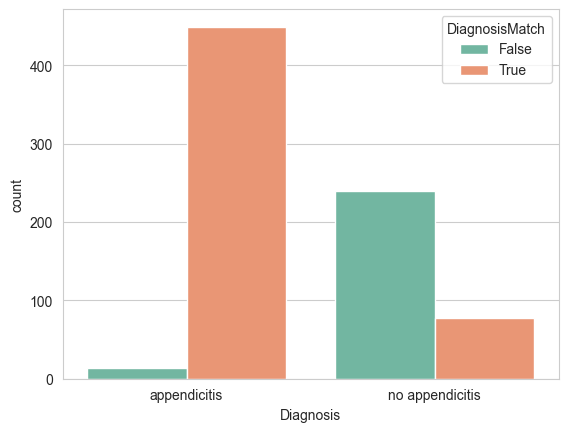

In [136]:
def diagnosis_match(diagnosis, diagnosis_presumptive):
    if diagnosis == diagnosis_presumptive:
        return True
    return False

dataedited = data
dataedited["DiagnosisMatch"] = dataedited.apply(lambda row:diagnosis_match(row["Diagnosis"], row["Diagnosis_Presumptive"]), axis= 1)

sns.countplot(data=data, x='Diagnosis', hue='DiagnosisMatch')

##### Options for missing data

- delete the record : when is a huge dataset (isn't our case, around 700 records)
- create a separate model ( for each missing feature I will need to create a separate model because they are the output/target feature)
- statistical methods (mean, median, mode)

In [137]:
missing_values_cols = data.isnull().sum().sort_values(ascending=False)
total = data.shape[0]
percentage = (missing_values_cols / total)
percentage 

Abscess_Location                    0.983376
Gynecological_Findings              0.966752
Conglomerate_of_Bowel_Loops         0.945013
Segmented_Neutrophils               0.930946
Ileus                               0.923274
Perfusion                           0.919437
Enteritis                           0.915601
Appendicolith                       0.911765
Coprostasis                         0.909207
Perforation                         0.896419
Appendicular_Abscess                0.891304
Bowel_Wall_Thickening               0.873402
Lymph_Nodes_Location                0.845269
Target_Sign                         0.823529
Meteorism                           0.820972
Pathological_Lymph_Nodes            0.740409
Appendix_Wall_Layers                0.721228
Surrounding_Tissue_Reaction         0.677749
Appendix_Diameter                   0.363171
RBC_in_Urine                        0.263427
Ketones_in_Urine                    0.255754
WBC_in_Urine                        0.254476
Ipsilatera

In [138]:
columns_more_than_25 = percentage[percentage > 0.25].index
data25 = data.drop(columns=columns_more_than_25, axis=1)
data25 = data25.dropna()
data25.describe()
data25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 780
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               456 non-null    float64
 1   BMI                               456 non-null    float64
 2   Sex                               456 non-null    object 
 3   Height                            456 non-null    float64
 4   Weight                            456 non-null    float64
 5   Length_of_Stay                    456 non-null    float64
 6   Management                        456 non-null    object 
 7   Severity                          456 non-null    object 
 8   Diagnosis_Presumptive             456 non-null    object 
 9   Diagnosis                         456 non-null    object 
 10  Alvarado_Score                    456 non-null    float64
 11  Paedriatic_Appendicitis_Score     456 non-null    float64
 12  Appendix_on_U

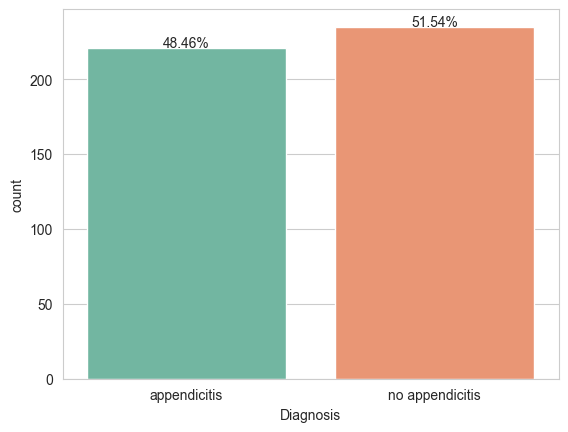

In [139]:
sns.set_style(style='whitegrid')
sns.set_palette(palette='Set2')
count_diag = sns.countplot(data=data25, x='Diagnosis', hue='Diagnosis', legend=False)

total = float(len(data25))
for p in count_diag.patches:
    height = p.get_height()
    count_diag.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.savefig("eda - tabelas/grafico_25.png")


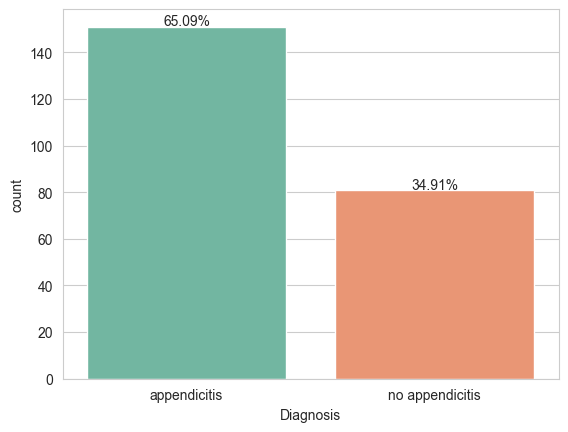

In [140]:
columns_more_than_50 = percentage[percentage > 0.50].index
data50 = data.drop(columns=columns_more_than_50, axis=1)
data50 = data50.dropna()
data50.head()
data50.shape
data50.describe()

count_diag = sns.countplot(data=data50, x='Diagnosis', hue='Diagnosis', legend=False)

total = float(len(data50))
for p in count_diag.patches:
    height = p.get_height()
    count_diag.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.savefig("eda - tabelas/grafico_50.png")


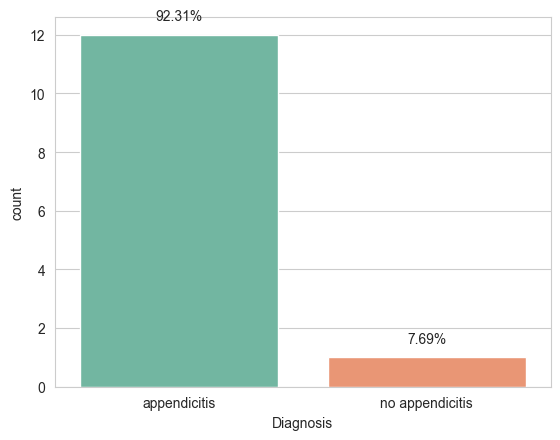

In [141]:
columns_more_than_75 = percentage[percentage > 0.75].index
data75 = data.drop(columns=columns_more_than_75, axis=1)
data75 = data75.dropna()
data75.head()
data75.shape
data75.describe()

count_diag = sns.countplot(data=data75, x='Diagnosis', hue='Diagnosis', legend=False)

total = float(len(data75))
for p in count_diag.patches:
    height = p.get_height()
    count_diag.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.savefig("eda - tabelas/grafico_75.png")

#### EDA

Text(0.5, 1.0, 'Valores Nulos por Coluna')

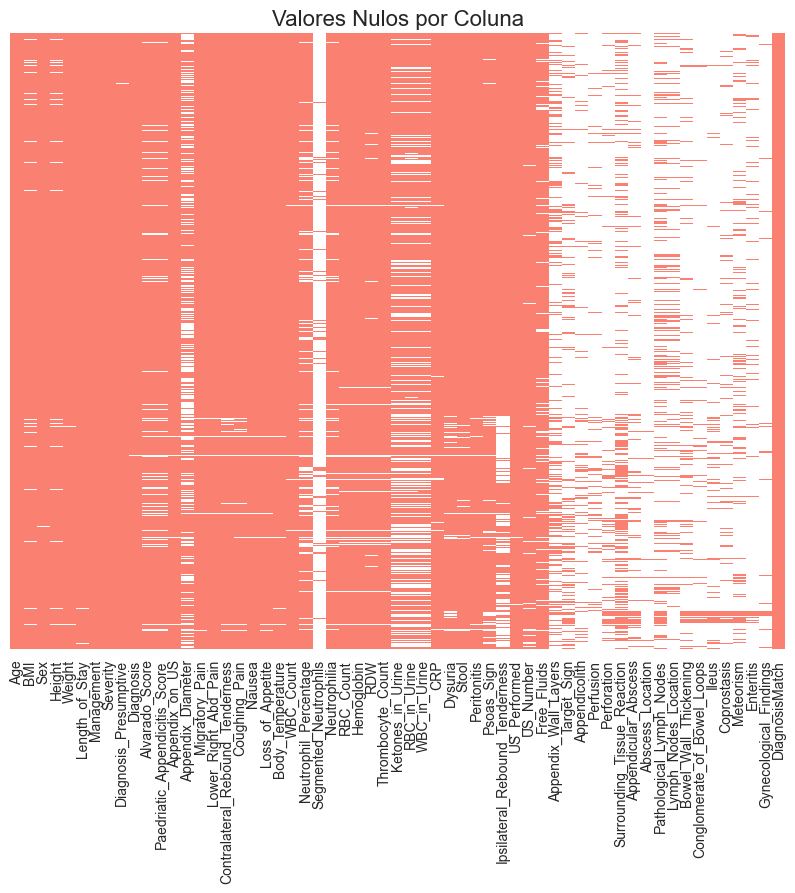

In [142]:
colors = ["salmon", "white"]
cmap = sns.color_palette(colors, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), xticklabels= data.columns, yticklabels=False, cbar=False, cmap=cmap)
plt.title('Valores Nulos por Coluna', fontsize=16)

##### Tabela de resumo estatístico 

In [143]:
# Primeira coluna terá o nome/tipo dos atributos e classe.  
# As demais colunas são: tipo do atributo (numérico, categórico etc), quantidade e porcentagem de dados ausentes em cada atributo, média (e desvio padrão), valor máximo e mínimo. Para dados categóricos, a frequência das categorias etc.
# types = data.dtypes

# stat_data = pd.DataFrame(data, columns=data.columns)

In [144]:
data_num = data.select_dtypes(include='float')

missing_values_cols_num = data_num.isnull().sum()
total_num = data_num.shape[0]
percentage_num = (missing_values_cols / total)
percentage_num 

df_percentage= pd.DataFrame(percentage_num)


df_percentage.reset_index(inplace=True)

df_percentage.rename(columns={0:'missing'}, inplace=True)

In [145]:
df_describe = data.describe()
df_describe = df_describe.transpose()

df_describe = pd.DataFrame(df_describe)
df_describe.reset_index(inplace=True)

df_describe = df_describe.merge(df_percentage,on='index')

df_describe

,index,count,mean,std,min,25%,50%,75%,max,missing
0,Age,781.0,11.346483,3.529979,0.000000,9.200000,11.438741,14.099932,18.360000,0.076923
1,BMI,754.0,18.912278,4.385684,7.827983,15.734882,18.070398,21.185877,38.156221,2.153846
2,Height,756.0,148.017460,19.732016,53.000000,137.000000,149.650000,163.000000,192.000000,2.000000
3,Weight,779.0,43.172542,17.390984,3.960000,29.500000,41.400000,54.000000,103.000000,0.230769
4,Length_of_Stay,778.0,4.284062,2.574057,1.000000,3.000000,3.000000,5.000000,28.000000,0.307692
5,Alvarado_Score,730.0,5.921918,2.155972,0.000000,4.000000,6.000000,8.000000,10.000000,4.000000
6,Paedriatic_Appendicitis_Score,730.0,5.253425,1.958456,0.000000,4.000000,5.000000,7.000000,10.000000,4.000000
7,Appendix_Diameter,498.0,7.762651,2.536671,2.700000,6.000000,7.500000,9.100000,17.000000,21.846154
8,Body_Temperature,775.0,37.404516,0.903678,26.900000,36.800000,37.200000,37.900000,40.200000,0.538462
9,WBC_Count,776.0,12.670683,5.366525,2.600000,8.200000,12.000000,16.200000,37.700000,0.461538


In [146]:
data.drop(columns=["DiagnosisMatch",'Diagnosis_Presumptive'], inplace=True)

#### Pre-processing

In [147]:
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

In [148]:
categorical_columns = data.select_dtypes(include=object).columns.tolist()

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

##### Handling Missing values

Tratamento de Dados Ausentes:

- Exclusão: Remover linhas ou colunas com dados ausentes, o que pode ser uma opção se a perda de dados for mínima.
- Imputação: Preencher dados ausentes usando várias técnicas, como a média, mediana ou moda para dados numéricos, ou a categoria mais frequente para dados categóricos. Métodos mais sofisticados incluem a imputação por KNN ou utilizando modelos preditivos.
    - SimpleImputer (media, mediana, mais frequente e constante)
    - IterativeImputer 
    - MissingIndicator
    - KNNImputer
- https://scikit-learn.org/stable/modules/impute.html#univariate-vs-multivariate-imputation
- Pesquisar outras formas de lidar com dados ausentes (IA Generativa?)

- Classificadores que lidam com dados ausentes
    - BaggingClassifier
    - DecisionTreeClassifier
    - HistGradientBoostingClassifier
    - RandomForestClassifier
    - StackingClassifier
    - VotingClassifier


Spliting Data

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Imputation

In [128]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 

from missforest.missforest import MissForest
import pandas as pd
import numpy as np

In [129]:
# imputation_mf = MissForest()

# categorical_columns = data.select_dtypes(include=object).columns.tolist()

# imputer = MissForest()

# # df_imputed = imputer.fit_transform(x=data, categorical= categorical_columns)
# df_imputed = imputer.fit_transform(x=data_num)

In [101]:
# Inicialize o imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Aplique o imputador ao conjunto de treino
X_train_imputed = knn_imputer.fit(X_train)
X_train_imputed = knn_imputer.transform(X_train)

X_test_imputed = knn_imputer.transform(X_test)


In [151]:
# Initialize the IterativeImputer
ite_imputer = IterativeImputer(max_iter=3, random_state=0)

# Fit and transform the data
X_train_imputed = ite_imputer.fit(X_train)
X_train_imputed = ite_imputer.transform(X_train)

X_test_imputed = ite_imputer.transform(X_test)



In [107]:
# print(pd.DataFrame(X_train_imputed).isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
dtype: int64


#### Modeling 

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score


In [26]:
models ={
    # "LogisticRegression":LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC(),
    # "NaiveBayes": CategoricalNB()
}

In [29]:
for name, clf in models.items():

    pipeline = Pipeline([
        # ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)

    #prediction
    y_pred = pipeline.predict(X_test)

    #set performance
    model_accuracy = accuracy_score(y_test, y_pred)
    model_f1= f1_score(y_test, y_pred, average='weighted')
    model_precision = precision_score(y_test, y_pred,average='weighted', labels=[0, 1])
    model_recall = recall_score(y_test, y_pred, average='weighted',labels=[0,1])
    model_rocauc_score = roc_auc_score(y_test, y_pred)

    print(f"\n- {name} Performance")
    print("Accuracy:", model_accuracy)
    print("F1:", model_f1)
    print("Precision:", model_precision)
    print("Recall:", model_recall)


    # print(y_pred)
    # print(np.array(y_test))


- Decision Tree Performance
Accuracy: 0.9808917197452229
F1: 0.9808640654852876
Precision: 0.9809199993038878
Recall: 0.9808917197452229

- Random Forest Performance
Accuracy: 0.9554140127388535
F1: 0.9554744043406465
Precision: 0.9556151412093952
Recall: 0.9554140127388535

- KNN Performance
Accuracy: 0.8280254777070064
F1: 0.8293310866444494
Precision: 0.8339438416286935
Recall: 0.8280254777070064

- SVM Performance
Accuracy: 0.7452229299363057
F1: 0.7474629106890638
Precision: 0.78487902678998
Recall: 0.7452229299363057


In [152]:
for name, clf in models.items():

    pipeline = Pipeline([
        # ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train_imputed, y_train)

    #prediction
    y_pred = pipeline.predict(X_test_imputed)

    #set performance
    model_accuracy = accuracy_score(y_test, y_pred)
    model_f1= f1_score(y_test, y_pred, average='weighted')
    model_precision = precision_score(y_test, y_pred,average='weighted', labels=[0, 1])
    model_recall = recall_score(y_test, y_pred, average='weighted',labels=[0,1])
    model_rocauc_score = roc_auc_score(y_test, y_pred)

    print(f"\n- {name} Performance")
    print("Accuracy:", model_accuracy)
    print("F1:", model_f1)
    print("Precision:", model_precision)
    print("Recall:", model_recall)


    # print(y_pred)
    # print(np.array(y_test))


- Decision Tree Performance
Accuracy: 0.9299363057324841
F1: 0.9300312068210158
Precision: 0.9302041185087667
Recall: 0.9299363057324841

- Random Forest Performance
Accuracy: 0.9426751592356688
F1: 0.9427528055808311
Precision: 0.9429096298590811
Recall: 0.9426751592356688

- KNN Performance
Accuracy: 0.8280254777070064
F1: 0.8290343372553417
Precision: 0.831738335921243
Recall: 0.8280254777070064

- SVM Performance
Accuracy: 0.7452229299363057
F1: 0.7477366306438813
Precision: 0.7796606296300912
Recall: 0.7452229299363057


#### Validation 
- Conjunto de Treinamento e Teste: Divida os dados em conjuntos de treinamento e teste para prepará-los para a modelagem e validação futuras.
- Imputar valores faltantes no dataset e comparar os métodos de imputation comparando o error (entre o imputado e original)
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
- Aplicação de classificadores em cima dos dados completados por todos os métodos da seção 2a e b.
- Testar: RandomForest, DecisionTree, NaiveBayes, SVM e KNN
